<a href="https://colab.research.google.com/github/nukinuki555/Gaussian-Processe-Regression/blob/master/Gaussian_Process_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### index
- GPy
- ネットのfull スクラッチ
- 教科書みながら実装

# GPyによるガウス過程回帰

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
!pip install GPy

     |████████████████████████████████| 993kB 3.5MB/s 
     |████████████████████████████████| 71kB 15.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/96/ee/cd/1c4dd7df63246b1e8de58af6d4457b7aed13509fdc0c918a13
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built GPy paramz


In [0]:
import GPy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
d = pd.read_csv('http://kasugano.sakura.ne.jp/images/2016/20161112/data-GPbook-Fig2_05.txt')

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(d.X[:, None], d.Y[:, None],shuffle=True)

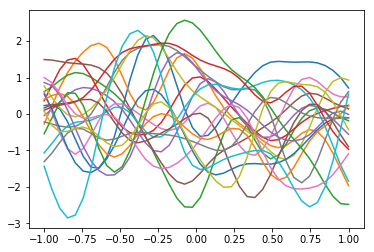

In [0]:
kernel = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=0.2)
np.random.seed(seed=123)
N_sim = 40 #分割の数、分割点をつなぐことで近似的に曲線を生成している(ガウス過程自体は無限次元なので、ダウンサンプリング)
x_sim = np.linspace(-1, 1, N_sim)
x_sim = x_sim[:, None]
mu = np.zeros(N_sim)
cov = kernel.K(x_sim, x_sim) #動径基底関数(RBFカーネル)による分散共分散行列の計算
y_sim = np.random.multivariate_normal(mu, cov, size=20) #多次元ガウス分布

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(20):
  ax.plot(x_sim[:], y_sim[i, :])
plt.show()

 /usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


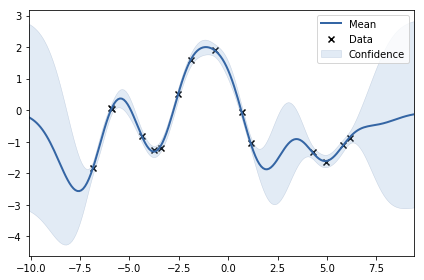

In [0]:
#kernel = GPy.kern.RBF(1)
kernel = GPy.kern.RBF(1) + GPy.kern.Bias(1) + GPy.kern.Linear(1) #RBF + Bias + Linearの凝ったカーネル、四則演算でカーネル作れるのすごい
model = GPy.models.GPRegression(xtrain, ytrain, kernel=kernel)
model.optimize()
model.plot()
plt.show()

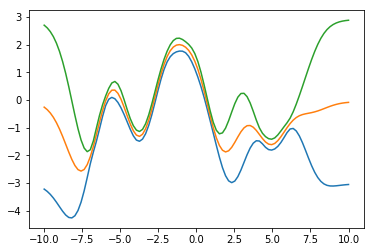

In [0]:
#prediction
x_pred = np.linspace(-10, 10, 100)
x_pred = x_pred[:, None]
y_qua_pred = model.predict_quantiles(x_pred, quantiles=(2.5, 50, 97.5))
for i in range(3):
  plt.plot(x_pred, y_qua_pred[i])
plt.show()

 /usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'
 /usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


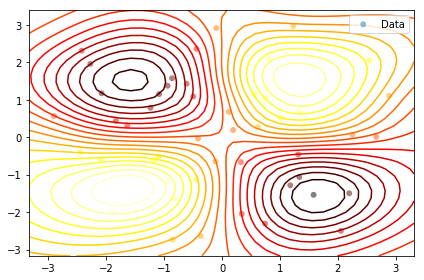

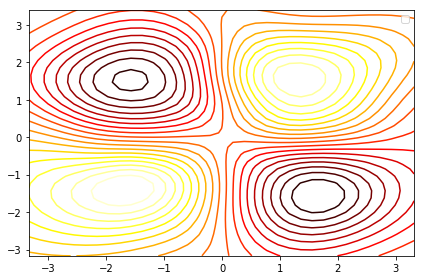

In [0]:
kernel = GPy.kern.Matern52(2, ARD=True)

np.random.seed(seed=123)
N = 50 
X = np.random.uniform(-3., 3., (N, 2)) #2次元配列
Y = np.sin(X[:, 0:1]) * np.sin(X[:, 1:2]) + np.random.randn(N, 1) * 0.05 #sin + sin + ε

model = GPy.models.GPRegression(X, Y, kernel)
model.optimize(messages=True, max_iters=1e5)
model.plot()

model.plot(fixed_inpus=[(0, -1.0)], plot_data=False)

#prediction
x_pred = np.array([np.linspace(-3, 3, 100), np.linspace(3, -3, 100)]).T
y_qua_pred = model.predict_quantiles(x_pred, quantiles=(2.5, 50, 97.5))[0]

 /usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


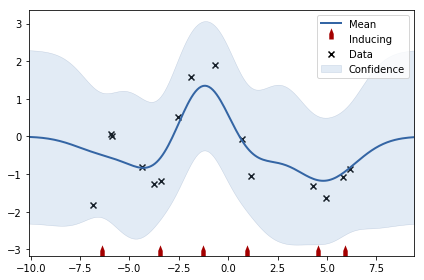

[[-21.87320075]] -13.533467266923903


In [0]:
kernel = GPy.kern.RBF(1)
m_full = GPy.models.GPRegression(xtrain, ytrain, kernel=kernel)
m_full.optimize()

Z = np.hstack((np.linspace(-6, -3, 3), np.linspace(3, 6, 3)))[:, None]
m_sparse = GPy.models.SparseGPRegression(xtrain, ytrain, Z=Z)
m_sparse.optimize()
m_sparse.plot()

plt.show()

print(m_sparse.log_likelihood(), m_full.log_likelihood())

 /usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


TypeError: ignored

 /usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


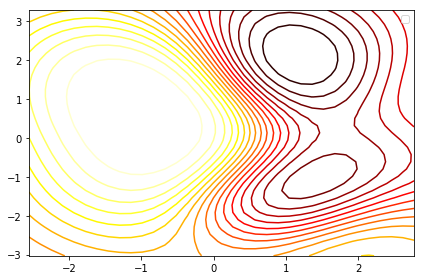

In [0]:
kernel = GPy.kern.RBF(2, ARD=True)

d = pd.read_csv('http://kasugano.sakura.ne.jp/images/2016/20161112/data-classification.txt')
model = GPy.models.GPClassification(d[['X1', 'X2']].values, d.Y[:, None])
model.optimize()


d0 = d[d.Y == 0]
d1 = d[d.Y == 1]
model.plot(plot_data=False)
model.plot(d0.X1, d0.X2, 'ro')
model.plot(d1.X1, d1.X2, 'bo')
# help(ax.)
ax.plot(d0.X1, d0.X2, 'ro')
ax.plot(d1.X1, d1.X2, 'bo')
# plt.savefig('output/fig5.png')

In [0]:
kernel = GPy.kern.RBF(1)

d = pd.read_csv('http://kasugano.sakura.ne.jp/images/2016/20161112/data-kubo11a.txt')

model = GPy.core.GP(X=np.linspace(1, 50, 50)[:, None], Y=d.Y[:, None], kernel=kernel,
                   inference_method=GPy.inference.latent_function_inference.Laplace(), 
                   likelihood=GPy.likelihoods.Poisson())
model.optimize()
model.plot()

x_pred = np.linspace(1, 50, 50)[:, None]
f_mean, f_var = model._raw_predict(x_pred)
f_upper, f_lower = f_mean + 2*np.sqrt(f_var), f_mean - 2.*np.sqrt(f_var)
plt.plot(x_pred, np.exp(f_mean), color='blue', lw=2)
plt.fill_between(x_pred[:, 0], np.exp(f_lower[:, 0]), np.exp(f_upper[:, 0]), color='blue', alpha=.1)
plt.show()

#[見つけたやつ](http://krasserm.github.io/2018/03/19/gaussian-processes/)

In [0]:
import numpy as np

def kernel(X1, X2, l=1.0, sigma_f = 1.0):
  sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
#   return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)
  return np.exp(-sqdist / l)

In [0]:
def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):
  X = X.ravel()
  mu = mu.ravel()
  uncertainty = 1.96 * np.sqrt(np.diag(cov))
  
  plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
  plt.plot(X, mu, label='Mean')
  for i, sample in enumerate(samples):
    plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
  if X_train is not None:
    plt.plot(X_train, Y_train, 'rx')
  plt.legend()

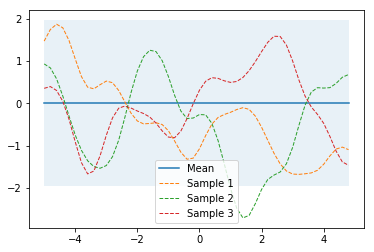

In [345]:
%matplotlib inline

# from gaussian_processes_util import plot_gp

X = np.arange(-5, 5, 0.2).reshape(-1, 1)

mu = np.zeros(X.shape)
cov = kernel(X, X)

samples = np.random.multivariate_normal(mu.ravel(), cov, 3)

plot_gp(mu, cov, X, samples=samples)

In [0]:
from numpy.linalg import inv

def posterior_predictive(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
  K = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train)) #kernel + ノイズ , np.eye(size): sizeのrankの単位行列を作れる
  K_s = kernel(X_train, X_s, l, sigma_f)
  K_ss = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
  K_inv = inv(K)
  
  mu_s = K_s.T.dot(K_inv).dot(Y_train)
  
  cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)
  
  return mu_s, cov_s

# 自分のやつ

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# import GPy
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [0]:
d = pd.read_csv('http://kasugano.sakura.ne.jp/images/2016/20161112/data-GPbook-Fig2_05.txt')
xtrain, xtest, ytrain, ytest = train_test_split(d.X[:, None], d.Y[:, None],shuffle=True)

In [0]:
xtest = np.arange(-7, 7, 0.2).reshape(-1, 1)

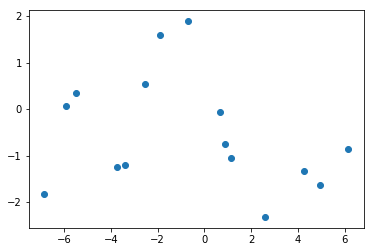

In [462]:
plt.scatter(xtrain, ytrain)
plt.show()

In [0]:
#RBFカーネル
def kernel_mine(x, xx, l=1.0, sigma_f = 1.0):
#   tmp = (x-xx).T.dot(x-xx)
#   return np.exp(-tmp/l)
  return np.exp(-np.linalg.norm(x-xx, ord=2)**2/l)
#   sqdist = np.sum(x**2, 1).reshape(-1, 1) + np.sum(xx**2, 1) - 2 * np.dot(x, xx.T)
#   return np.exp(-sqdist / l)
#   return 

In [0]:
def gpr(xtest, xtrain, ytrain, kernel):
  
  #yの期待値計算
  N = ytrain.shape[0]
  M = xtest.shape[0]
  
  K_00 = np.zeros((N, N))
  K_01 = np.zeros((N, M)) 
  K_11 = np.zeros((M, M))
  
  #K00
  for i in range(N):
    for j in range(N):
      K_00[i, j] = kernel(xtrain[i], xtrain[j])
  
  #K0, K01
  for i in range(N):
    for j in range(M):
      K_01[i, j] = kernel(xtrain[i], xtest[j])
  for i in range(M):
    for j in range(M):
      K_11[i, j] = kernel(xtest[i], xtest[j])
  
  
  #計算重そうなので最初に計算しとく
  K_00_inv = np.linalg.inv(K_00)
  
  #muの計算
  mu = K_01.T.dot(K_00_inv).dot(ytrain)
  
  #varの計算
  var = K_11 - K_01.T.dot(K_00_inv).dot(K_01)

  return mu, var #mu: xtestに対するyの期待値, 

In [0]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [0]:
def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):
  X = X.ravel()
  mu = mu.ravel()
  uncertainty = 1.96 * np.sqrt(np.diag(cov))
  
  plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
  plt.plot(X, mu, label='Mean')
  for i, sample in enumerate(samples):
    plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
  if X_train is not None:
    plt.plot(X_train, Y_train, 'rx')
  plt.legend()

In [0]:
mu, var = gpr(xtest, xtrain, ytrain, kernel_mine)
# K00, K01, K11 = gpr(xtest, xtrain, ytrain, kernel_mine)

In [0]:
mu_correct, var_correct = posterior_predictive(xtest, xtrain, ytrain)
# K, K_s, K_ss = posterior_predictive(xtest, xtrain, ytrain)

In [0]:
samples = np.random.multivariate_normal(mu.ravel(), var, 3)

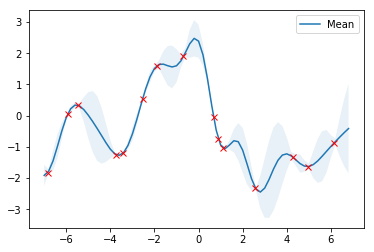

In [479]:
# plot_gp(mu, var, xtest, X_train=xtrain, Y_train=ytrain, samples=samples)
plot_gp(mu, var, xtest, X_train=xtrain, Y_train=ytrain)

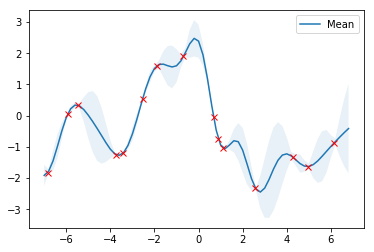

In [480]:
plot_gp(mu_correct, var_correct, xtest, X_train=xtrain, Y_train=ytrain)